<a href="https://colab.research.google.com/github/rrizkiramadhan08/RizkiRamadhanTask/blob/main/FirstWeekTasks/04_Logistic_Regression_Rizki_Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [44]:
## 1. Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

## Importing the dataset

In [45]:
## 2. Importing the dataset
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values  # Mengambil semua kolom kecuali yang terakhir sebagai variabel independen
y = dataset.iloc[:, -1].values   # Mengambil kolom terakhir sebagai variabel dependen (target)

## Splitting the dataset into the Training set and Test set

---



In [46]:
## 3. Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) # Membagi data ke dalam set training dan testing, 25% data untuk testing, 75% untuk training

## Feature Scaling

In [47]:
## 4. Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Membuat objek StandardScaler untuk melakukan normalisasi fitur
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [48]:
## 5. Training the Logistic Regression model on the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0) # Membuat model Logistic Regression dengan random_state=0
classifier.fit(X_train, y_train) # Melatih model Logistic Regression menggunakan data training

LogisticRegression(random_state=0)

## Predicting a new result

In [49]:
## 6. Predicting a new result
new_data = [[30, 87000]]  # Data contoh dengan umur 30 dan gaji 87000
new_data_scaled = sc.transform(new_data)
prediction = classifier.predict(new_data_scaled)
print(f"Prediksi untuk data baru {new_data}: {prediction}")

Prediksi untuk data baru [[30, 87000]]: [0]


## Predicting the Test set results

In [50]:
## 7. Predicting the Test set results

y_pred = classifier.predict(X_test) # Memprediksi hasil untuk data testing



## Making the Confusion Matrix

In [51]:
## 8. Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Menghitung dan mencetak akurasi dari hasil prediksi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

Confusion Matrix:
[[65  3]
 [ 8 24]]
Akurasi: 89.00%


## Visualising the Training set results

<ipython-input-52-88a86f9829ab>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


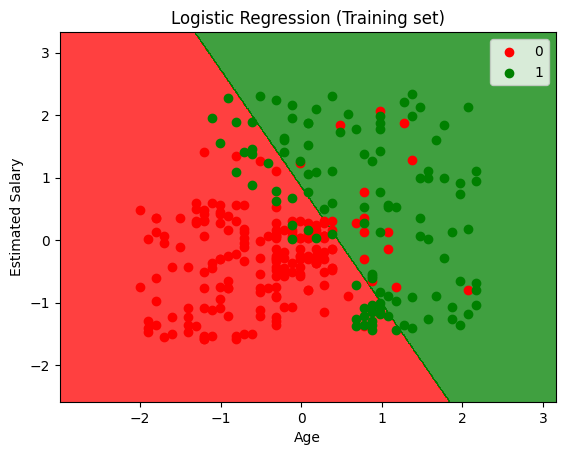

In [52]:
## 9. Visualising the Training set results

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-53-8487c73ba23d>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


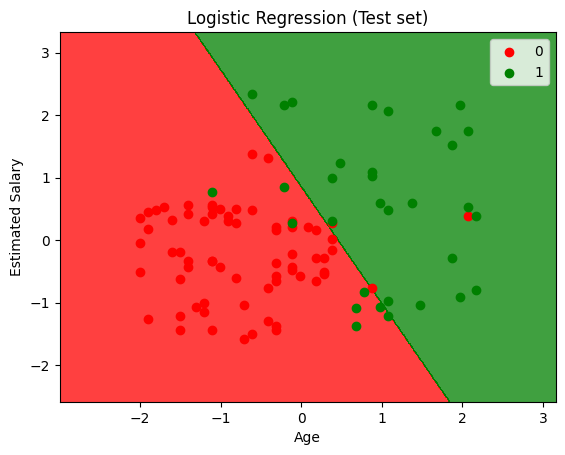

In [53]:
## 10. Visualising the Test set results

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()